In [8]:
# Import libraries
import random
import os
import numpy as np 
import pandas as pd 
import requests
from dotenv import load_dotenv

# Date
import datetime as dt
from datetime import date, timedelta, datetime

# EDA
import matplotlib.pyplot as plt
import plotly.express as px
# import seaborn as sns
import plotly.graph_objects as go

# FE
from tsfresh import extract_features, select_features, extract_relevant_features
from tsfresh.utilities.dataframe_functions import impute
from sklearn.inspection import permutation_importance
# import eli5
# from eli5.sklearn import PermutationImportance
import shap

# Time Series - EDA and Modelling
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Modeling and preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from prophet import Prophet
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'sklearn'

In [9]:
%pip install scikit-lear

  Using cached tsfresh-0.20.2-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached tsfresh-0.20.2-py2.py3-none-any.whl (95 kB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.1/11.0 MB 4.3 MB/s eta 0:00:03
   - -------------------------------------- 0.5/11.0 MB 5.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.0 MB 7.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.0 MB 8.9 MB/s eta 0:00:02
   ------- -------------------------------- 2.2/11.0 MB 9.8 MB/s eta 0:00:01
   ---------- ----------------------------- 2.8/11.0 MB 10.3 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/11.0 MB 10.7 MB/s eta 0:00:01
   -------------- ------------------------- 4.0/11.0 MB 11.0 MB/s eta 0:00:01
   ---------------- ----------------------- 4.6/11.0 MB 11.2 MB/


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Load environment variables from .env file
load_dotenv()

# Import environment variables
start_date = os.getenv('start_date')
end_date = os.getenv('end_date')
btc_etf_start_date = os.getenv('btc_etf_start_date')
btc_etf_end_date = os.getenv('btc_etf_end_date')

# Set main parameters
cryptocurrency = 'BTC'
target = 'ADJ_CLOSE'
forecasting_days = 10  

# 2) Load the data

In [11]:
df = pd.read_parquet(os.path.join(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))), "MLCryptoPredictor\\data\\final_df_without_stationarity_test.parquet.gzip"))

## i) Data Preparation

In [12]:
df.head()

,OPEN,HIGH,LOW,CLOSE,ADJ_CLOSE,VOLUME,GOLD_ADJ_CLOSE,SILVER_ADJ_CLOSE,OIL_ADJ_CLOSE,GOLD_VOLUME,...,BTC_PRICE_MIN_7D,BTC_PRICE_MAX_7D,BTC_PRICE_MIN_14D,BTC_PRICE_MAX_14D,BTC_PRICE_MIN_21D,BTC_PRICE_MAX_21D,BTC_PRICE_MIN_30D,BTC_PRICE_MAX_30D,BTC_PRICE_MIN_60D,BTC_PRICE_MAX_60D
DATE,,,,,,,,,,,,,,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,1313.699951,17.121000,60.369999,68.0,...,0,0,0,0,0,0,0,0,0,0
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,1313.699951,17.121000,60.369999,68.0,...,0,0,0,0,0,0,0,0,0,0
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,1316.199951,17.184999,61.630001,42.0,...,0,0,0,0,0,0,0,0,0,0
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,1319.400024,17.188999,62.009998,2.0,...,0,0,0,0,0,0,0,0,0,0
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,1320.300049,17.205000,61.439999,1.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print([col for col in df.columns])

print(f"Minimum Date: {df.index.min()}", f"Maximum Date: {df.index.max()}")

has_nan = df.isna().any().any()
print(f"Are there any NaN values in the DataFrame? {has_nan}")

['OPEN', 'HIGH', 'LOW', 'CLOSE', 'ADJ_CLOSE', 'VOLUME', 'GOLD_ADJ_CLOSE', 'SILVER_ADJ_CLOSE', 'OIL_ADJ_CLOSE', 'GOLD_VOLUME', 'SILVER_VOLUME', 'OIL_VOLUME', 'EUR_USD_ADJ_CLOSE', 'USD_JPY_ADJ_CLOSE', 'GBP_USD_ADJ_CLOSE', 'USD_CNY_ADJ_CLOSE', 'VIX_ADJ_CLOSE', 'CBOE_INTEREST_RATE_ADJ_CLOSE', 'TREASURY_YIELD_5YRS_ADJ_CLOSE', 'RUSSEL_2000_ADJ_CLOSE', 'ISHARES_20YR_ADJ_CLOSE', 'TREASURY_BILL_13WK_ADJ_CLOSE', 'RUSSEL_2000_VOLUME', 'ISHARES_20YR_VOLUME', 'TESLA_ADJ_CLOSE', 'AMD_ADJ_CLOSE', 'INTEL_ADJ_CLOSE', 'APPLE_ADJ_CLOSE', 'NVIDIA_ADJ_CLOSE', 'META_ADJ_CLOSE', 'GOOGLE_ADJ_CLOSE', 'TESLA_VOLUME', 'AMD_VOLUME', 'INTEL_VOLUME', 'APPLE_VOLUME', 'NVIDIA_VOLUME', 'META_VOLUME', 'GOOGLE_VOLUME', 'GBTC_ADJ_CLOSE', 'ARKB_ADJ_CLOSE', 'BITB_ADJ_CLOSE', 'FBTC_ADJ_CLOSE', 'BTCO_ADJ_CLOSE', 'IBIT_ADJ_CLOSE', 'HODL_ADJ_CLOSE', 'BITO_ADJ_CLOSE', 'GBTC_VOLUME', 'ARKB_VOLUME', 'BITB_VOLUME', 'FBTC_VOLUME', 'BTCO_VOLUME', 'IBIT_VOLUME', 'HODL_VOLUME', 'BITO_VOLUME', 'ETH_ADJ_CLOSE', 'ETH_VOLUME', 'USDT_ADJ_C

## Get Ready for train/test split

In [14]:
# Create a new dataframe with the potential target variable and the features
# df_targets = df.iloc[:, -13:]
# Remove the last 13 columns from the original DataFrame
df = df.iloc[:, :-13]

In [15]:
def create_lag_features(df, columns, lags):
    """
    Create lagged features for specified columns.
    
    :param df: pandas DataFrame containing the original data.
    :param columns: List of column names to create lag features for.
    :param lags: List of lag periods to create.
    :return: DataFrame with lagged features added.
    """
    for column in columns:
        for lag in lags:
            df[f'{column}_LAG{lag}'] = df[column].shift(lag)
    return df

In [16]:
def feature_engineering_pipeline(df):
    """
    Apply feature engineering transformations to the DataFrame.
    
    :param df: pandas DataFrame containing the original data.
    :return: DataFrame with new features added.
    """
    # Define columns and parameters
    price_columns = ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
    lags = [1, 2, 3, 5, 10]
    
    # Create lag features
    df = create_lag_features(df, price_columns, lags)
    
    # Drop rows with NaN values generated by lagging and rolling calculations
    df.dropna(inplace=True)
    
    return df

In [17]:
df = feature_engineering_pipeline(df)

#### Split up the targets from the dataset

In [18]:
X = df.drop(df.iloc[:, :6].columns.tolist() + [col for col in df.columns if 'OTHERS' in col], axis=1)
y = df['ADJ_CLOSE']

## LSTM

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming X and Y are your feature and target DataFrames
# X shape: (2272, 311), Y shape: (2272,)

# Normalize the features (X)
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalize the target (Y)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(y.values.reshape(-1, 1))

# Create sequences
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:(i + seq_length)])
        y_seq.append(y[i + seq_length])
    return np.array(X_seq), np.array(y_seq)

sequence_length = 30  # Adjust based on your preference
X_seq, y_seq = create_sequences(X_scaled, Y_scaled, sequence_length)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(100, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler_Y.inverse_transform(predictions)
actual = scaler_Y.inverse_transform(y_test)

# Calculate metrics
mae = np.mean(np.abs(predictions - actual))
rmse = np.sqrt(np.mean((predictions - actual)**2))
mape = np.mean(np.abs((actual - predictions) / actual)) * 100
r2 = 1 - (np.sum((actual - predictions)**2) / np.sum((actual - np.mean(actual))**2))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')
print(f'R-squared: {r2}')

# Function for making next-day predictions
def predict_next_day(model, last_sequence, scaler_X, scaler_Y):
    # Ensure last_sequence is scaled
    last_sequence_scaled = scaler_X.transform(last_sequence)
    # Reshape for model input
    model_input = last_sequence_scaled.reshape((1, sequence_length, 311))
    # Make prediction
    prediction_scaled = model.predict(model_input)
    # Inverse transform the prediction
    prediction = scaler_Y.inverse_transform(prediction_scaled)
    return prediction[0][0]

# Example usage (assuming you have the next day's features available)
# next_day_features = ... # Your next day's features
# next_day_sequence = np.vstack((X_scaled[-sequence_length+1:], next_day_features))
# next_day_prediction = predict_next_day(model, next_day_sequence, scaler_X, scaler_Y)
# print(f"Predicted ADJ_CLOSE for next day: {next_day_prediction}")

Epoch 1/100


c:\Users\Stamatis\Desktop\MLCryptoPredictor\MLCryptoPredictor\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0400 - val_loss: 0.0017
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0053 - val_loss: 0.0017
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0023 - val_loss: 0.0032
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0019 - val_loss: 0.0038
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0014 - val_loss: 0.0053
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.3553e-04 - val_loss: 0.0025
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss:

Training data shape: (1817, 311)
Testing data shape: (455, 311)
Training data date range: 2018-01-11 00:00:00 to 2023-01-01 00:00:00
Testing data date range: 2023-01-02 00:00:00 to 2024-03-31 00:00:00
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'subsample': 0.7, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}
Best cross-validation score:  0.6114340021650907


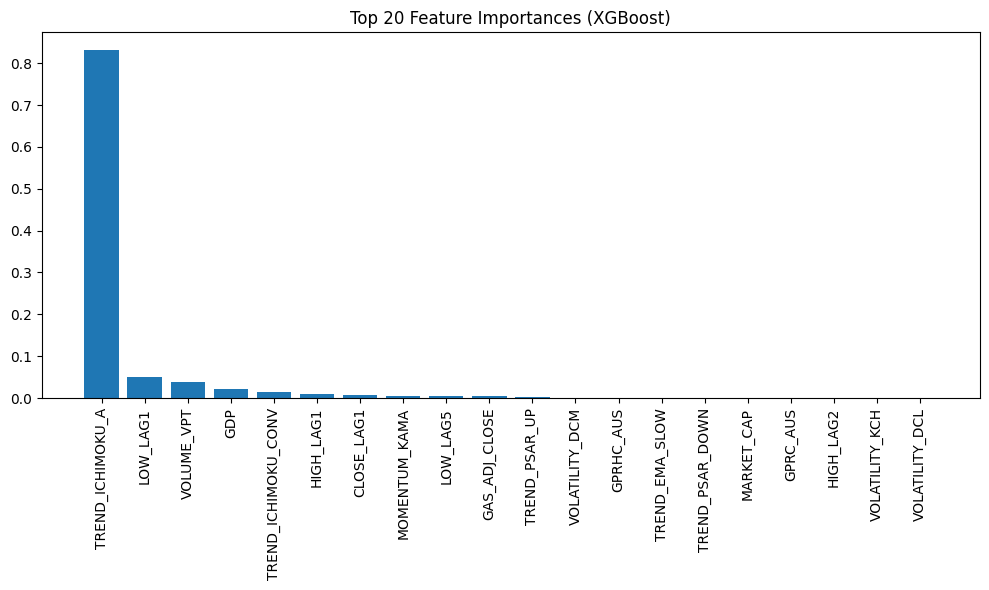

Selected features: ['SILVER_ADJ_CLOSE', 'OIL_ADJ_CLOSE', 'SILVER_VOLUME', 'OIL_VOLUME', 'GBP_USD_ADJ_CLOSE', 'CBOE_INTEREST_RATE_ADJ_CLOSE', 'RUSSEL_2000_ADJ_CLOSE', 'ISHARES_20YR_ADJ_CLOSE', 'TREASURY_BILL_13WK_ADJ_CLOSE', 'RUSSEL_2000_VOLUME', 'ISHARES_20YR_VOLUME', 'AMD_ADJ_CLOSE', 'NVIDIA_ADJ_CLOSE', 'META_ADJ_CLOSE', 'GOOGLE_ADJ_CLOSE', 'TESLA_VOLUME', 'AMD_VOLUME', 'INTEL_VOLUME', 'GOOGLE_VOLUME', 'ETH_ADJ_CLOSE', 'ETH_VOLUME', 'USDT_VOLUME', 'USDC_ADJ_CLOSE', 'USDC_VOLUME', 'DOGE_ADJ_CLOSE', 'DOGE_VOLUME', 'XRP_ADJ_CLOSE', 'XRP_VOLUME', 'SOL_ADJ_CLOSE', 'SOL_VOLUME', 'GAS_ADJ_CLOSE', 'GAS_VOLUME', 'BTC_FEAR_AND_GREED_INDEX', 'GREED', 'SP500_ADJUSTED', 'GDP', 'RGDP', 'INTEREST_RATE_ADJUSTED', 'INFLATION_RATE_ADJUSTED', 'STICKY_CPI', 'M2_MONEY_STOCK_ADJUSTED', 'VOLUME_ADI', 'VOLUME_OBV', 'VOLUME_CMF', 'VOLUME_FI', 'VOLUME_EM', 'VOLUME_SMA_EM', 'VOLUME_VPT', 'VOLUME_VWAP', 'VOLUME_MFI', 'VOLATILITY_BBM', 'VOLATILITY_BBL', 'VOLATILITY_BBP', 'VOLATILITY_KCC', 'VOLATILITY_KCH', 'VOLAT

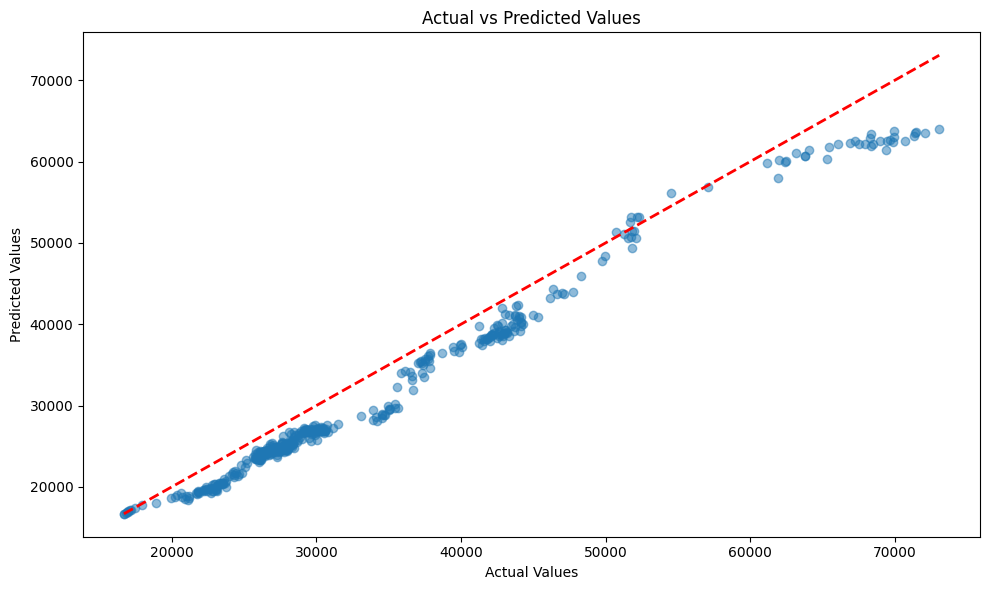

In [12]:
# # Calculate the split point (80% of the data)
# split_point = int(len(df) * 0.8)

# # Split the data
# X_train = X.iloc[:split_point]
# X_test = X.iloc[split_point:]
# y_train = y.iloc[:split_point]
# y_test = y.iloc[split_point:]

# print(f"Training data shape: {X_train.shape}")
# print(f"Testing data shape: {X_test.shape}")
# print(f"Training data date range: {X_train.index.min()} to {X_train.index.max()}")
# print(f"Testing data date range: {X_test.index.min()} to {X_test.index.max()}")

# # Define the parameter grid for RandomizedSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7, 9],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.6, 0.7, 0.8, 0.9],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
#     'gamma': [0, 0.1, 0.2, 0.3]
# }

# # Create the XGBoost model
# xgb_model = XGBRegressor(random_state = 42)

# ## Set up TimeSeriesSplit
# # tscv = TimeSeriesSplit(n_splits=3)

# # Set up RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
#                                    n_iter=10, verbose=2, random_state=42, n_jobs=-1)

# # Fit RandomizedSearchCV
# random_search.fit(X_train, y_train)

# # Get the best model
# best_model = random_search.best_estimator_

# print("Best parameters found: ", random_search.best_params_)
# print("Best cross-validation score: ", random_search.best_score_)

# # Get feature importances
# feature_importance = pd.DataFrame({'feature': X_train.columns, 
#                                    'importance': best_model.feature_importances_})
# feature_importance = feature_importance.sort_values('importance', ascending=False)

# # Visualize feature importances
# plt.figure(figsize=(10, 6))
# plt.bar(feature_importance['feature'][:20], feature_importance['importance'][:20])
# plt.xticks(rotation=90)
# plt.title("Top 20 Feature Importances (XGBoost)")
# plt.tight_layout()
# plt.show()

# # Select features based on importance threshold
# selector = SelectFromModel(best_model, prefit=True, threshold='median')
# X_train_selected = selector.transform(X_train)
# X_test_selected = selector.transform(X_test)
# selected_features = X_train.columns[selector.get_support()].tolist()

# print("Selected features:", selected_features)

# # Evaluate the model on the test set
# y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R-squared Score: {r2}")

# # Plot actual vs predicted values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Actual vs Predicted Values")
# plt.tight_layout()
# plt.show()

In [16]:
feature_importance[:50]

,feature,importance
128,TREND_ICHIMOKU_A,0.832214
296,LOW_LAG1,0.049472
85,VOLUME_VPT,0.037259
70,GDP,0.021689
126,TREND_ICHIMOKU_CONV,0.015531
291,HIGH_LAG1,0.010586
301,CLOSE_LAG1,0.008400
161,MOMENTUM_KAMA,0.004956
299,LOW_LAG5,0.004642
60,GAS_ADJ_CLOSE,0.003833


## Prophet

In [46]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from typing import List, Dict
import joblib

warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

class CryptoData(BaseModel):
    date: str
    features: Dict[str, float]

class PredictionResponse(BaseModel):
    date: str
    prediction: float

def load_data():
    X = df.drop(df.iloc[:, :6].columns.tolist() + [col for col in df.columns if 'OTHERS' in col], axis=1)
    y = df['ADJ_CLOSE']
    return y, X

def prepare_data(y: pd.Series, X: pd.DataFrame):
    
    # Create a new DataFrame with all columns at once
    df = pd.concat([
        pd.DataFrame({'ds': y.index, 'y': y.values}),
        X
    ], axis=1)
    
    # Add day of week and is_weekend features
    df['DAY_OF_WEEK'] = df['ds'].dt.dayofweek
    df['IS_WEEKEND'] = df['DAY_OF_WEEK'].isin([5, 6]).astype(int)
    
    return df

def train_prophet_model(df: pd.DataFrame, external_regressors: List[str]):
    model = Prophet(
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=True,
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=10
    )
    for regressor in external_regressors:
        model.add_regressor(regressor)
    
    model.fit(df)
    return model

def evaluate_model(model: Prophet, df: pd.DataFrame, period: str = '30 days'):
    cv_results = cross_validation(model, initial='730 days', period=period, horizon='1 days')
    performance = performance_metrics(cv_results)
    return cv_results, performance

def plot_results(model: Prophet, df: pd.DataFrame, cv_results: pd.DataFrame):
    # Plot forecast
    future = model.make_future_dataframe(periods=30)
    for col in df.columns:
        if col not in ['ds', 'y']:
            future[col] = df[col].iloc[-1]  # Use last known value for external regressors
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        forecast = model.predict(future)
    
    fig1 = model.plot(forecast)
    plt.title('Prophet Forecast')
    plt.savefig('forecast.png')
    plt.close()

    # Plot components
    fig2 = model.plot_components(forecast)
    plt.savefig('components.png')
    plt.close()

    # Plot cross-validation results
    fig3, ax = plt.subplots()
    ax.plot(cv_results['ds'], cv_results['y'], 'k.', alpha=0.5, label='Actual')
    ax.plot(cv_results['ds'], cv_results['yhat'], 'b-', label='Predicted')
    ax.fill_between(cv_results['ds'], cv_results['yhat_lower'], cv_results['yhat_upper'], color='b', alpha=0.3)
    ax.legend()
    plt.title('Cross-validation Results')
    plt.savefig('cv_results.png')
    plt.close()

    # Plot train/validation loss
    fig4, ax = plt.subplots()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        train_pred = model.predict(df[['ds'] + [col for col in df.columns if col not in ['y']]])
    train_loss = np.abs(df['y'] - train_pred['yhat'])
    val_loss = np.abs(cv_results['y'] - cv_results['yhat'])
    ax.plot(df['ds'], train_loss, label='Train Loss')
    ax.plot(cv_results['ds'], val_loss, label='Validation Loss')
    ax.legend()
    plt.title('Train/Validation Loss')
    plt.savefig('train_val_loss.png')
    plt.close()

In [48]:
def main():
    # Load and prepare data
    y, X = load_data()
    df = prepare_data(y, X)

    # Split data into train and test sets
    train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

    # Train model
    external_regressors = [col for col in df.columns if col not in ['ds', 'y']]
    model = train_prophet_model(train_df, external_regressors)

    # Evaluate model
    cv_results, performance = evaluate_model(model, train_df)
    print("Model Performance:")
    print(performance)

    # Plot results
    plot_results(model, df, cv_results)

    # Save model
    joblib.dump(model, 'prophet_model.joblib')

    return model

# FastAPI app
app = FastAPI()

@app.post("/predict", response_model=PredictionResponse)
async def predict(data: CryptoData):
    try:
        model = joblib.load('prophet_model.joblib')
        future = pd.DataFrame({'ds': [pd.to_datetime(data.date)]})
        for feature, value in data.features.items():
            future[feature] = value
        forecast = model.predict(future)
        return PredictionResponse(date=data.date, prediction=forecast['yhat'].iloc[0])
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

In [49]:
main()

C:\Users\Stamatis\AppData\Local\Temp\ipykernel_78468\2049715967.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = X[col].values
C:\Users\Stamatis\AppData\Local\Temp\ipykernel_78468\2049715967.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = X[col].values
C:\Users\Stamatis\AppData\Local\Temp\ipykernel_78468\2049715967.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

  0%|          | 0/37 [00:00<?, ?it/s]

21:10:28 - cmdstanpy - INFO - Chain [1] start processing
21:10:28 - cmdstanpy - INFO - Chain [1] done processing
21:10:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:10:29 - cmdstanpy - INFO - Chain [1] start processing
21:11:09 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Stamatis\Desktop\MLCryptoPredictor\MLCryptoPredictor\venv\lib\site-packages\prophet\forecaster.py:1272: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['trend'] = self.predict_trend(df)
21:11:10 - cmdstanpy - INFO - Chain [1] start processing
21:11:10 - cmdstanpy - INFO - Chain [1] done processing
21:11:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Oper

Model Performance:
  horizon           mse           rmse           mae      mape     mdape  \
0  1 days  6.144512e+10  247881.256547  60230.390708  1.888694  0.455738   

      smape  coverage  
0  0.730237       0.0  


c:\Users\Stamatis\Desktop\MLCryptoPredictor\MLCryptoPredictor\venv\lib\site-packages\prophet\forecaster.py:1272: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['trend'] = self.predict_trend(df)
c:\Users\Stamatis\Desktop\MLCryptoPredictor\MLCryptoPredictor\venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Stamatis\Desktop\MLCryptoPredictor\MLCryptoPredictor\venv\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 

In [ ]:
if __name__ == "__main__":
    main()